In [3]:
import pandas as pd 

In [4]:
df = pd.read_csv("diabetes.csv")

In [5]:
check_for_NaN = df.isnull().any(axis=1) #If there is at least one NaN value in the row, true is given back, otherwise false is given back.
check_for_NaN

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [6]:
df = df.dropna() #Drop rows with NaN values
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
df.duplicated(subset=None, keep=False) #All rows that have more than one occurency will be marked as true

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [8]:
df.drop_duplicates(keep='first') #dropping the duplicates, leaving only the first element

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # definition of the MinMaxScaler
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns) #Scaling the columns of the dataframe
scaled_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0.0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0.0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0.0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1.0


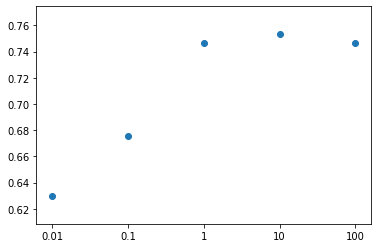

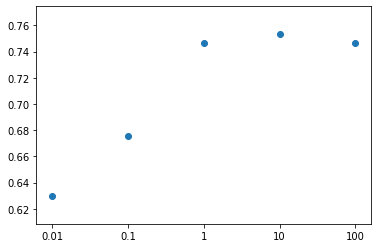

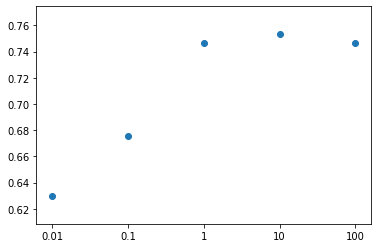

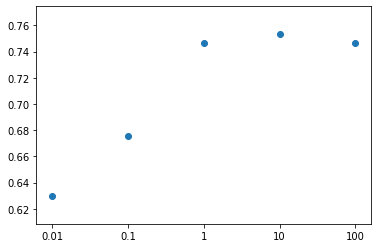

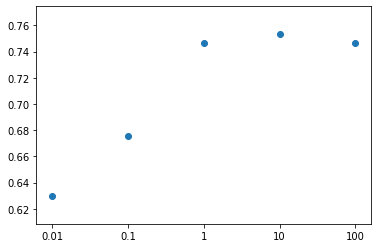

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
result = []
for j in range(0,5): #5fold scheme
    X_train = scaled_df.sample(frac=0.8, random_state=1) # splitting training and validation
    X_val = scaled_df.loc[~scaled_df.index.isin(X_train.index)]
    Y_train = X_train['Outcome']
    X_train = X_train = X_train.iloc[:, :-1]
    Y_val = X_val['Outcome']
    X_val = X_val = X_val.iloc[:, :-1]
    for i in [0.01,0.1,1,10,100]: #for evaluating C parameter
        logreg = LogisticRegression(C=i,penalty='l2')
        logreg.fit(X_train, Y_train)
        result.append(logreg.score(X_val,Y_val))
    x = ["0.01","0.1","1","10","100"]
    plt.scatter(x,result)
    plt.show()
    result = []